In [ ]:
import pandas as pd
data=pd.read_excel("/content/Online_Retail.xlsx")


In [ ]:
data["CustomerID"]=data["CustomerID"].fillna(data["CustomerID"].mode()[0])
data["Description"]=data["Description"].fillna(data["Description"].mode()[0])
product_dict={}
for i in data["Country"].unique():
      product_dict[i]={}
      country_data=data[data["Country"]==i]
      product_name=list(country_data["Description"])
      product_quantity=list(country_data["Quantity"])
      for j in country_data["Description"].unique():
          product_dict[i][j]=0
      for j in range(len(product_name)):
           product_dict[i][product_name[j]]+=product_quantity[j]
uk_top_seller=[]
sorts=list(product_dict['United Kingdom'].values())
sorts.sort(reverse=True)
for i in range(0,10):
       for j in product_dict['United Kingdom']:
              if(sorts[i]==product_dict['United Kingdom'][j]):
                      uk_top_seller.append(j)
                      break
another=data

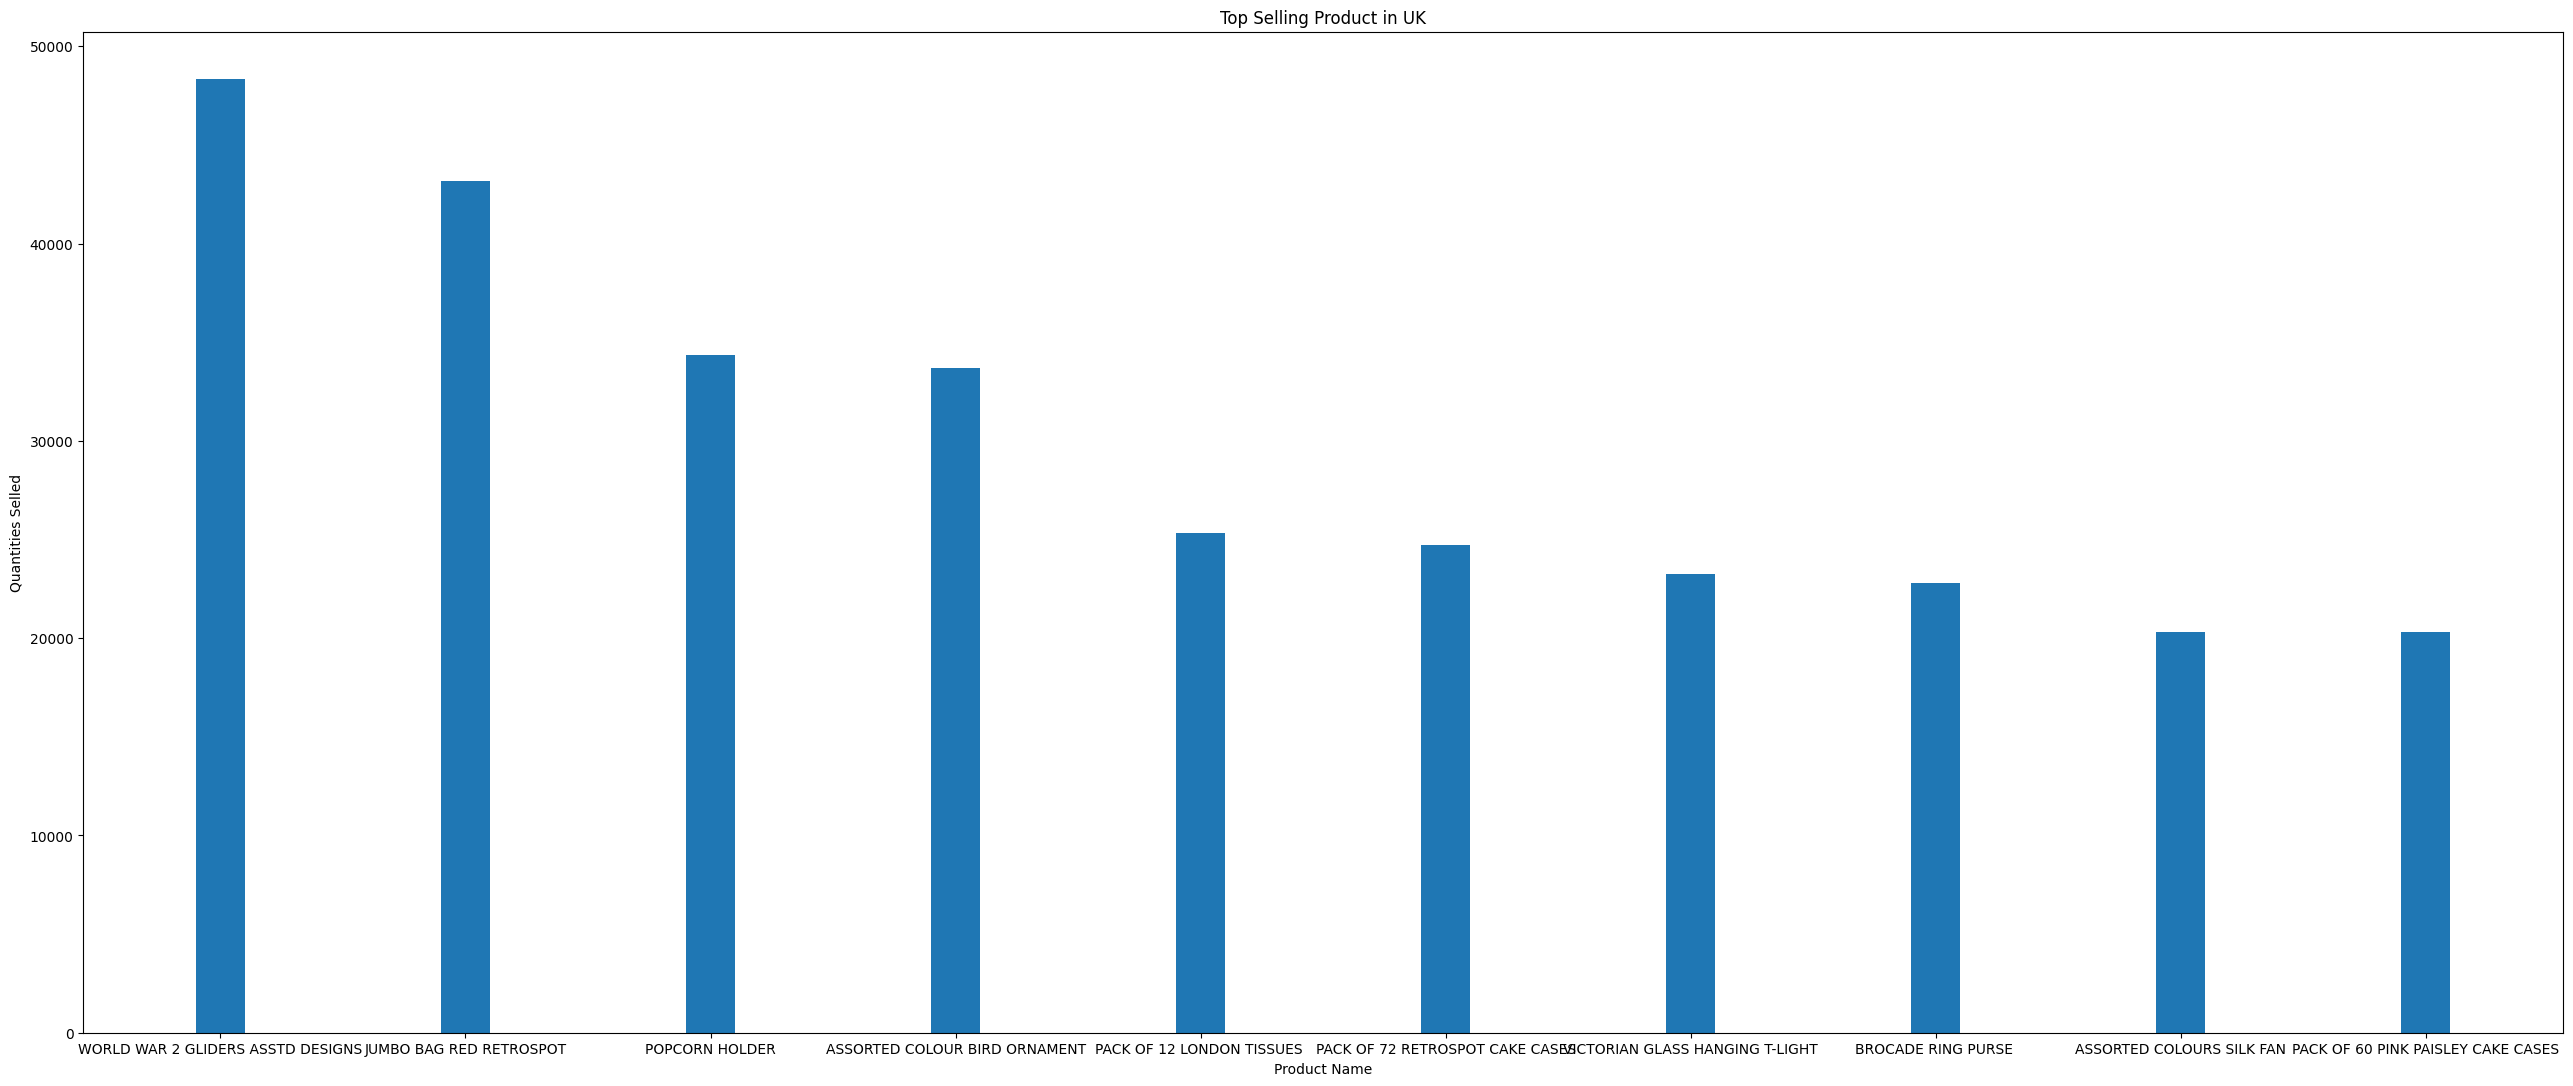

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (32, 13))
plt.bar(uk_top_seller, sorts[:10],width=0.2)
plt.xlabel("Product Name")
plt.ylabel("Quantities Selled")
plt.title("Top Selling Product in UK")
plt.show()

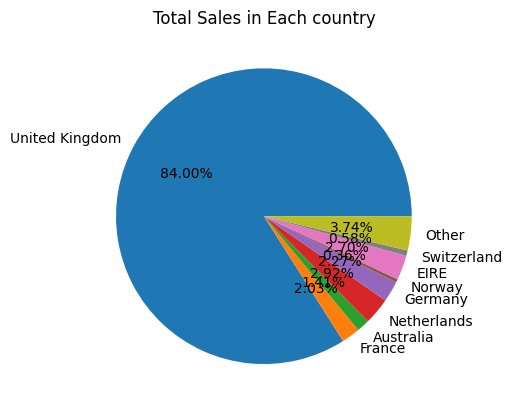

In [ ]:
total_sales_in_each_country={}
for i in another["Country"].unique():
     total_sales_in_each_country[i]=0
for i in range(0,len(another)):
         total_sales_in_each_country[another["Country"][i]]+=(another["Quantity"][i]*another["UnitPrice"][i])
list1=list(total_sales_in_each_country.keys())[:8]
list2=list(total_sales_in_each_country.values())[:8]
list1.append("Other")
list2.append(sum(list(total_sales_in_each_country.values())[8:]))
plt.title("Total Sales in Each country")
plt.pie(list2, labels = list1,autopct='%1.2f%%')
plt.show()

In [ ]:
# data=data.drop(columns=["InvoiceNo"])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

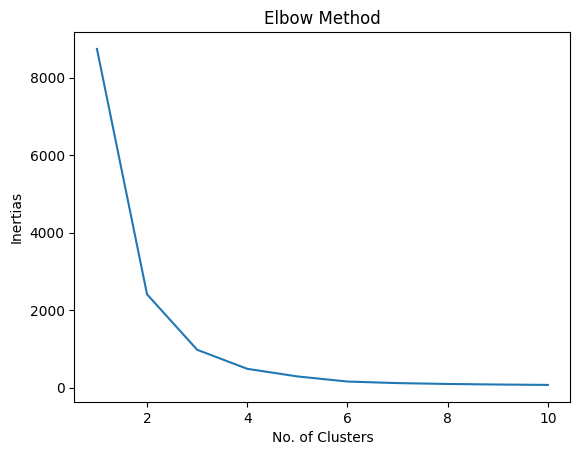

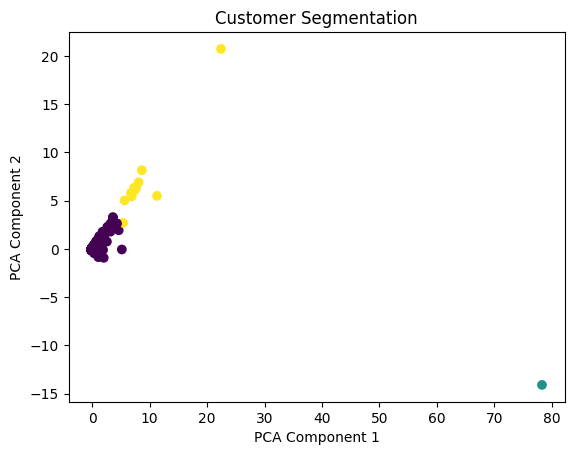

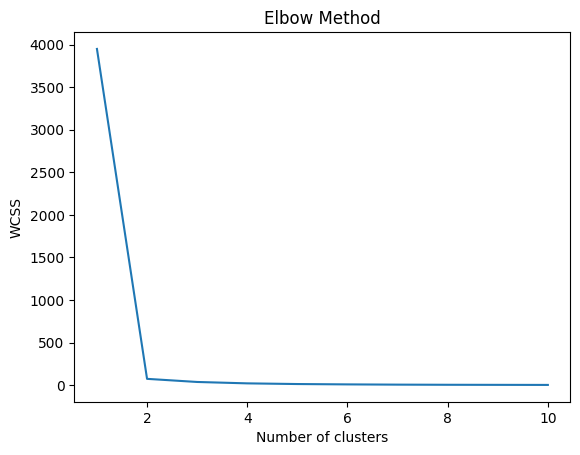

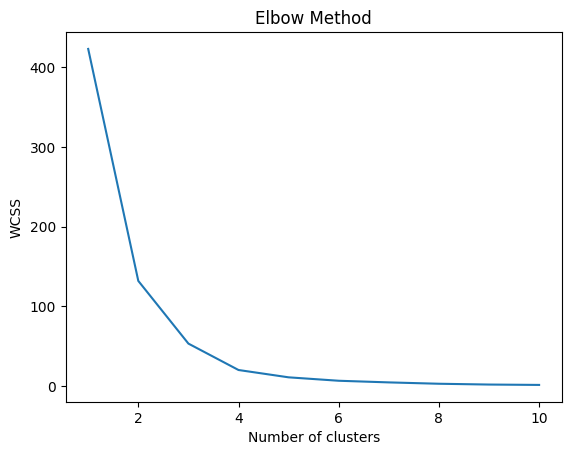

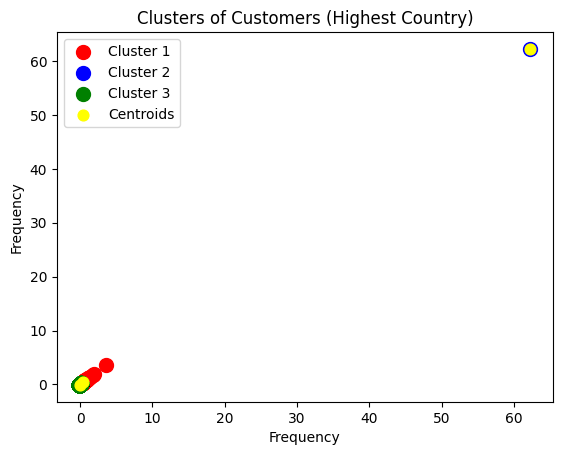

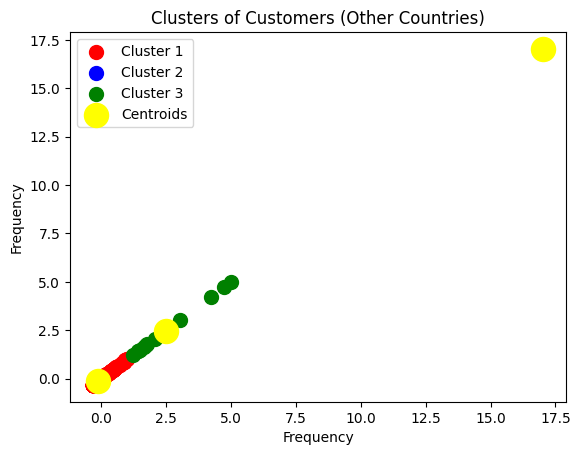

In [ ]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
data=another
data = data.groupby(['CustomerID']).agg({
    'InvoiceNo': 'nunique',
    'Quantity': 'sum',
})

data = data.dropna()

# Scale the data for KMeans clustering
# scaler = StandardScaler()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data)

# Find optimal number of clusters using the elbow method
interias = {}
count=[]
for i in range(1, 11):
      kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
      kmeans.fit(df_scaled)
      interias[i]=kmeans.inertia_
plt.plot(interias.keys(),interias.values())
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertias')
plt.show()
# Perform KMeans clustering on the data
kmeans = KMeans(n_clusters=3,n_init=10, init='k-means++', random_state=42)
kmeans.fit(df_scaled)

# Reduce the dimensionality of the data using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
# Plot the clusters in 2D space
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_)
plt.title('Customer Segmentation')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
online_retail_df=another
online_retail_df.dropna(inplace=True)

# Convert the InvoiceDate column to a datetime object
online_retail_df['InvoiceDate'] = pd.to_datetime(online_retail_df['InvoiceDate'])

# Create a new column for the total amount of each transaction
online_retail_df['TotalAmount'] = online_retail_df['Quantity'] * online_retail_df['UnitPrice']

# Split the data between the country with the highest data and other countries
highest_country = online_retail_df['Country'].value_counts().index[0]
highest_country_df = online_retail_df[online_retail_df['Country'] == highest_country]
other_countries_df = online_retail_df[online_retail_df['Country'] != highest_country]

# Cluster the highest_country_df dataset
highest_country_freq_df = highest_country_df.groupby(['CustomerID']).agg({'InvoiceNo': 'nunique'}).reset_index()
highest_country_freq_df = highest_country_freq_df.rename(columns={'InvoiceNo': 'Frequency'})
# print(highest_country_freq_df)
# Standardize the frequency data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
highest_country_freq_std = scaler.fit_transform(highest_country_freq_df[['Frequency']])
# highest_country_freq_std = highest_country_freq_df
# print(highest_country_freq_std)

# Determine the optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(highest_country_freq_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-means clustering with the chosen number of clusters for the highest_country_df dataset
highest_country_kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
highest_country_kmeans.fit(highest_country_freq_std)

# Add cluster labels to the highest_country_freq_df dataframe
highest_country_freq_df['Cluster'] = highest_country_kmeans.labels_

# Cluster the other_countries_df dataset
other_countries_freq_df = other_countries_df.groupby(['CustomerID']).agg({'InvoiceNo': 'nunique'}).reset_index()
other_countries_freq_df = other_countries_freq_df.rename(columns={'InvoiceNo': 'Frequency'})

# Standardize the frequency data
other_countries_freq_std = scaler.fit_transform(other_countries_freq_df[['Frequency']])

# Determine the optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(other_countries_freq_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-means clustering with the chosen number of clusters for the other_countries_df dataset
other_countries_kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
other_countries_kmeans.fit(other_countries_freq_std)
other_countries_freq_df['Cluster'] = other_countries_kmeans.labels_
plt.scatter(highest_country_freq_std[highest_country_kmeans.labels_ == 0, 0], highest_country_freq_std[highest_country_kmeans.labels_ == 0, 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(highest_country_freq_std[highest_country_kmeans.labels_ == 1, 0], highest_country_freq_std[highest_country_kmeans.labels_ == 1, 0], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(highest_country_freq_std[highest_country_kmeans.labels_ == 2, 0], highest_country_freq_std[highest_country_kmeans.labels_ == 2, 0], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(highest_country_kmeans.cluster_centers_[:, 0], highest_country_kmeans.cluster_centers_[:, 0], s = 60, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers (Highest Country)')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.scatter(other_countries_freq_std[other_countries_kmeans.labels_ == 0, 0], other_countries_freq_std[other_countries_kmeans.labels_ == 0, 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(other_countries_freq_std[other_countries_kmeans.labels_ == 1, 0], other_countries_freq_std[other_countries_kmeans.labels_ == 1, 0], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(other_countries_freq_std[other_countries_kmeans.labels_ == 2, 0], other_countries_freq_std[other_countries_kmeans.labels_ == 2, 0], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(other_countries_kmeans.cluster_centers_[:, 0], other_countries_kmeans.cluster_centers_[:, 0], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers (Other Countries)')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
def plot_dendrogram(model, **kwargs):
    counts = {}

    # Loop through each node in the model's children_ attribute
    # print(enumerate(model.children_)
    for i in  range(len(model.children_)):
        # Get the indices of the samples in each child node
        left = model.children_[i][0]
        right = model.children_[i][1]

        # If the left child is a leaf node, its count is 1, otherwise get the count from the counts dictionary
        if  len(model.labels_)>left:
            left_count = 1
        else:
            left_count = counts[left]

        # If the right child is a leaf node, its count is 1, otherwise get the count from the counts dictionary
        if len(model.labels_)>right:
            right_count = 1
        else:
            right_count = counts[right]

        # Add the counts for the left and right child nodes and store it in the counts dictionary
        counts[i + len(model.labels_)] = left_count + right_count

    count_array=[]
    for i in range(len(model.labels_), len(model.labels_) + len(model.children_)):
                 count_array.append(counts[i])
    count_array=np.array(count_array)
    # Create the linkage matrix by concatenating the children_, distances_, and count_array arrays horizontally
    linkage_matrix = np.hstack([model.children_, model.distances_.reshape(-1, 1), count_array.reshape(-1, 1)])

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

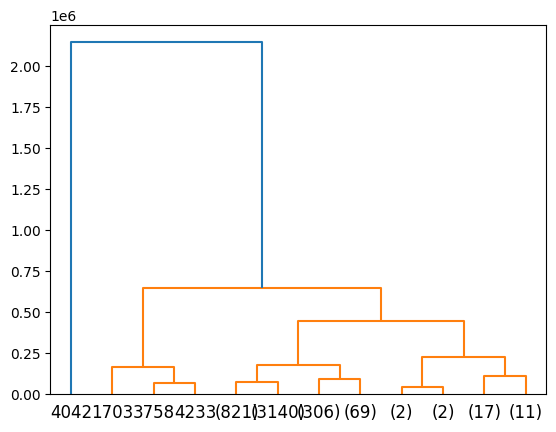

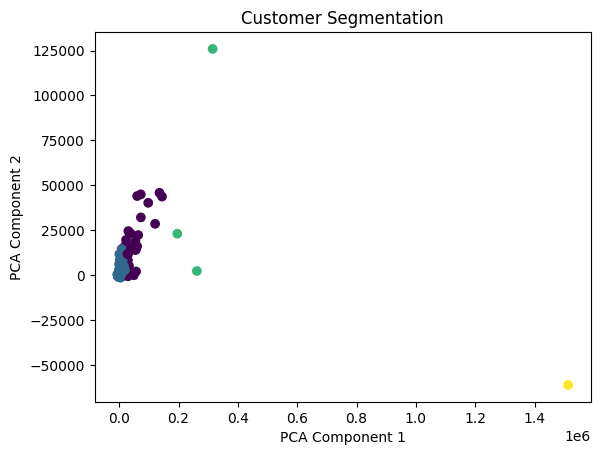

In [ ]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
# print(another)
# new=another.drop(columns=["StockCode","Description","InvoiceDate"])
particular_custumer_data = pd.DataFrame({'Country': another.groupby('CustomerID')['Country'].unique().str[0],
                              'invoiceNo': another.groupby('CustomerID')['InvoiceNo'].nunique(),
                              'Mean_purchase': another.groupby('CustomerID')['TotalAmount'].mean(),
                              'Sum_purchase': another.groupby('CustomerID')['TotalAmount'].sum(),
                              'Item': another.groupby('CustomerID')['StockCode'].nunique(),
                              'Quantity':another.groupby('CustomerID')['Quantity'].sum(),
                              'Mean_quant': another.groupby('CustomerID')['Quantity'].mean()})
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='ward').fit(particular_custumer_data.drop(columns=['Country']))

# plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap='viridis')
plot_dendrogram(model, truncate_mode="level", p=4)
# print(particular_custumer_data)
plt.show()
model = AgglomerativeClustering(distance_threshold=None, n_clusters=4,linkage='ward').fit(particular_custumer_data.drop(columns=['Country']))

pca = PCA(n_components=2)
df_pca = pca.fit_transform(particular_custumer_data.drop(columns=["Country"]))
# Plot the clusters in 2D space
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=model.labels_)
plt.title('Customer Segmentation')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()